HELLO

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

from simulation.helpers import (
    collect_metrics_once,
    collect_metrics_many
)
from distributions import sample_truncated_normal

# -------------------
# Parameters
# -------------------
ARRIVAL_RATE = 10        # λ = 10 travelers per minute
SERVICE_TIME = 0.5       # average service time (minutes per traveler, 30s)
SERVICE_RATE = 1 / SERVICE_TIME   # μ = 2 travelers per minute
RUN_UNTIL = 1000          # number of arrivals to simulate in each run
REPLICATIONS = 500       # number of independent runs per setting
QUEUE_OPTIONS = [4, 6, 8, 10]


In [2]:
# Service time distributions
service_distribution = (0.5, 1/6)             # mean 0.5 min, std 0.167
additional_screening_distribution = (2.0, 2.0) # mean 2 min, std 2

In [3]:
empirical_no_screening = {}
empirical_with_screening = {}

for stations in QUEUE_OPTIONS:
    # Without additional screening
    empirical_no_screening[stations] = collect_metrics_many(
        ARRIVAL_RATE, SERVICE_RATE, RUN_UNTIL,
        num_queues=stations,
        service_distribution=service_distribution,
        additional_screening_distribution=None,
        num_replications=REPLICATIONS
    )

    # With additional screening
    empirical_with_screening[stations] = collect_metrics_many(
        ARRIVAL_RATE, SERVICE_RATE, RUN_UNTIL,
        num_queues=stations,
        service_distribution=service_distribution,
        additional_screening_distribution=additional_screening_distribution,
        num_replications=REPLICATIONS
    )


In [4]:
# -------------------
# Format results
# -------------------
def format_results(results_dict, metric):
    rows = []
    for stations, metrics in results_dict.items():
        mean, low, high = metrics[metric]
        rows.append([stations, mean, low, high])
    return pd.DataFrame(rows, columns=["Stations", "Mean", "CI Low", "CI High"])


In [5]:
# Waiting time
df_wait_no_screening = format_results(empirical_no_screening, "avg_waiting_time")
df_wait_with_screening = format_results(empirical_with_screening, "avg_waiting_time")

# Average queue length
df_queue_no_screening = format_results(empirical_no_screening, "avg_queue_length")
df_queue_with_screening = format_results(empirical_with_screening, "avg_queue_length")

# Maximum queue length
df_max_no_screening = format_results(empirical_no_screening, "max_queue_length")
df_max_with_screening = format_results(empirical_with_screening, "max_queue_length")


In [6]:
# ---------- Helpers ----------
def _round_cols(df, cols, nd=3):
    for c in cols:
        if c in df:
            df[c] = df[c].astype(float).round(nd)
    return df

def make_ci_table(df_no, df_yes, value_col_name):
    """
    Returns a single wide table with columns:
    Stations | Mean (No) | CI Low (No) | CI High (No) | Mean (With) | CI Low (With) | CI High (With)
    """
    a = df_no.rename(columns={
        "Mean": f"{value_col_name} (Mean, No Screening)",
        "CI Low": f"{value_col_name} (CI Low, No Screening)",
        "CI High": f"{value_col_name} (CI High, No Screening)"
    })
    b = df_yes.rename(columns={
        "Mean": f"{value_col_name} (Mean, With Screening)",
        "CI Low": f"{value_col_name} (CI Low, With Screening)",
        "CI High": f"{value_col_name} (CI High, With Screening)"
    })
    merged = a.merge(b, on="Stations", how="inner")
    num_cols = [c for c in merged.columns if c != "Stations"]
    return _round_cols(merged[["Stations"] + num_cols], num_cols, nd=3)


In [7]:
# ---------- CI tables for your three empirical metrics ----------
tbl_wait_ci = make_ci_table(df_wait_no_screening, df_wait_with_screening, "Waiting Time (min)")
tbl_avgq_ci = make_ci_table(df_queue_no_screening, df_queue_with_screening, "Average Queue Length")
tbl_maxq_ci = make_ci_table(df_max_no_screening, df_max_with_screening, "Max Queue Length")

print("Empirical Waiting Time (means & 95% CIs)")
display(tbl_wait_ci)

print("\nEmpirical Average Queue Length (means & 95% CIs)")
display(tbl_avgq_ci)

print("\nEmpirical Maximum Queue Length (means & 95% CIs)")
display(tbl_maxq_ci)


Empirical Waiting Time (means & 95% CIs)


,Stations,"Waiting Time (min) (Mean, No Screening)","Waiting Time (min) (CI Low, No Screening)","Waiting Time (min) (CI High, No Screening)","Waiting Time (min) (Mean, With Screening)","Waiting Time (min) (CI Low, With Screening)","Waiting Time (min) (CI High, With Screening)"
0,4,25.584,25.184,25.985,25.823,25.412,26.233
1,6,4.893,4.558,5.229,5.169,4.809,5.530
2,8,1.320,1.130,1.510,1.328,1.128,1.528
3,10,0.615,0.465,0.765,0.669,0.542,0.797



Empirical Average Queue Length (means & 95% CIs)


,Stations,"Average Queue Length (Mean, No Screening)","Average Queue Length (CI Low, No Screening)","Average Queue Length (CI High, No Screening)","Average Queue Length (Mean, With Screening)","Average Queue Length (CI Low, With Screening)","Average Queue Length (CI High, With Screening)"
0,4,42.626,42.093,43.159,43.048,42.505,43.591
1,6,8.115,7.662,8.568,8.424,7.946,8.903
2,8,2.318,2.109,2.527,2.362,2.141,2.584
3,10,1.256,1.134,1.379,1.314,1.199,1.428



Empirical Maximum Queue Length (means & 95% CIs)


,Stations,"Max Queue Length (Mean, No Screening)","Max Queue Length (CI Low, No Screening)","Max Queue Length (CI High, No Screening)","Max Queue Length (Mean, With Screening)","Max Queue Length (CI Low, With Screening)","Max Queue Length (CI High, With Screening)"
0,4,86.254,85.314,87.194,86.310,85.321,87.299
1,6,17.908,17.089,18.727,18.570,17.659,19.481
2,8,6.914,6.432,7.396,6.970,6.490,7.450
3,10,3.864,3.560,4.168,4.084,3.785,4.383


In [8]:
# -------------------
# Theoretical formulas
# -------------------
def theoretical_mg1_wait(lam, mean_s, var_s):
    """Pollaczek–Khinchine: average waiting time in queue for M/G/1."""
    rho = lam * mean_s
    if rho >= 1:
        return np.inf
    ES2 = var_s + mean_s**2
    return lam * ES2 / (2 * (1 - rho))

def theoretical_multi_server(arrival_rate, mean_s, var_s, c):
    """
    Approximate parallel M/G/1 queues by splitting arrivals evenly.
    Returns:
      Wq_total  : average waiting time (minutes)
      Lq_total  : average # waiting (across all queues)
      L_total   : average # in system (waiting + in service)
    """
    lam_per = arrival_rate / c
    Wq = theoretical_mg1_wait(lam_per, mean_s, var_s)          # per-station wait
    Lq_per = lam_per * Wq                                       # Little's Law (per station)
    Lq_total = c * Lq_per
    rho = lam_per * mean_s
    L_per = Lq_per + rho                                        # add 'in service' per station
    L_total = c * L_per
    return Wq, Lq_total, L_total

def add_screening_effect(mean_s, var_s, p=0.03, mean_extra=2.0, var_extra=4.0):
    """
    Adjust mean/variance when an extra Bernoulli(p) * B is added to service time.
    E[S'] = E[S] + p*E[B]
    Var(S') = Var(S) + Var(I*B) where Var(I*B) = p*(Var(B)+E[B]^2) - (p*E[B])^2
    """
    mean_new = mean_s + p * mean_extra
    extra_var = p * (var_extra + mean_extra**2) - (p * mean_extra)**2
    var_new = var_s + extra_var
    return mean_new, var_new

def theory_tables(queue_options, arrival_rate, mean_s, var_s,
                  p=0.03, mean_extra=2.0, var_extra=4.0):
    """Compute theory for all c in queue_options, with/without screening."""
    rows_no, rows_yes = [], []
    for c in queue_options:
        # no screening
        Wq, Lq, L = theoretical_multi_server(arrival_rate, mean_s, var_s, c)
        rows_no.append([c, Wq, Lq, L])

        # with screening
        mean_s2, var_s2 = add_screening_effect(mean_s, var_s, p, mean_extra, var_extra)
        Wq2, Lq2, L2 = theoretical_multi_server(arrival_rate, mean_s2, var_s2, c)
        rows_yes.append([c, Wq2, Lq2, L2])

    cols = ["Stations", "Wq (min)", "Lq (waiting only)", "L (system)"]
    import pandas as pd
    df_no = pd.DataFrame(rows_no, columns=cols)
    df_yes = pd.DataFrame(rows_yes, columns=cols)
    return df_no, df_yes


In [9]:
# -------------------
# Generate theory tables for comparison
# -------------------
theory_no_screen, theory_with_screen = theory_tables(
    QUEUE_OPTIONS, ARRIVAL_RATE, mean_s=0.5, var_s=(1/6)**2,
    p=0.03, mean_extra=2.0, var_extra=4.0
)
print("Theoretical Results Without Screening:")
display(theory_no_screen)
print("\nTheoretical Results With Screening:")
display(theory_with_screen)


Theoretical Results Without Screening:


,Stations,Wq (min),Lq (waiting only),L (system)
0,4,inf,inf,inf
1,6,1.388889,13.888889,18.888889
2,8,0.462963,4.629630,9.629630
3,10,0.277778,2.777778,7.777778



Theoretical Results With Screening:


,Stations,Wq (min),Lq (waiting only),L (system)
0,4,inf,inf,inf
1,6,7.222222,72.222222,77.822222
2,8,1.203704,12.037037,17.637037
3,10,0.656566,6.565657,12.165657


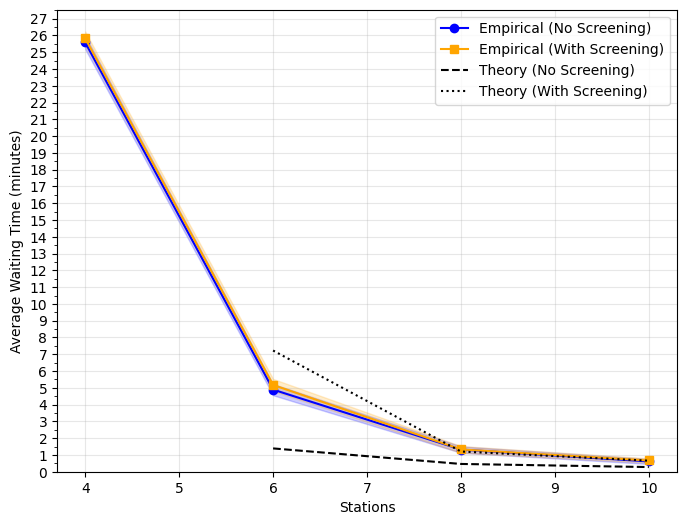

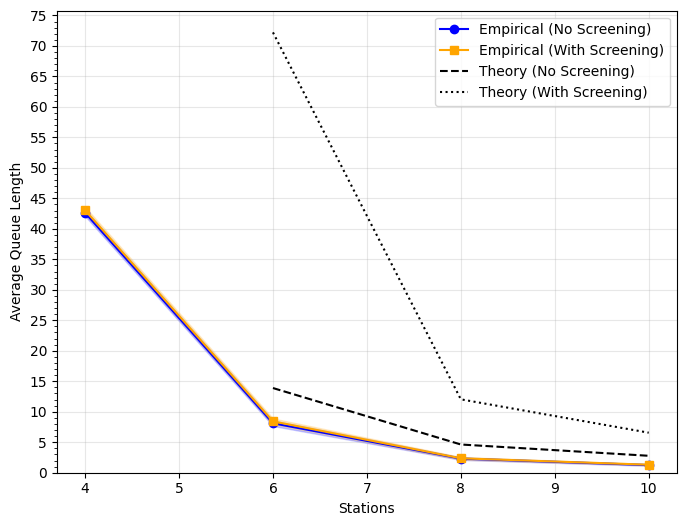

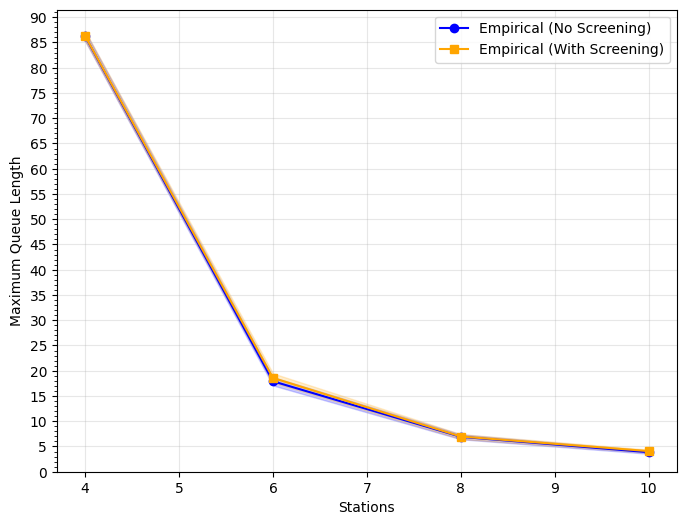

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# -------------------
# Plots with Confidence Intervals
# -------------------

# 1. Average Waiting Time vs Stations
plt.figure(figsize=(8,6))
plt.plot(df_wait_no_screening["Stations"], df_wait_no_screening["Mean"], 
         'o-', label="Empirical (No Screening)", color="blue")
plt.fill_between(df_wait_no_screening["Stations"], 
                 df_wait_no_screening["CI Low"], df_wait_no_screening["CI High"], 
                 color="blue", alpha=0.2)

plt.plot(df_wait_with_screening["Stations"], df_wait_with_screening["Mean"], 
         's-', label="Empirical (With Screening)", color="orange")
plt.fill_between(df_wait_with_screening["Stations"], 
                 df_wait_with_screening["CI Low"], df_wait_with_screening["CI High"], 
                 color="orange", alpha=0.2)

plt.plot(theory_no_screen["Stations"], theory_no_screen["Wq (min)"], 'k--', 
         label="Theory (No Screening)")
plt.plot(theory_with_screen["Stations"], theory_with_screen["Wq (min)"], 'k:', 
         label="Theory (With Screening)")

plt.xlabel("Stations")
plt.ylabel("Average Waiting Time (minutes)")
plt.ylim(bottom=0)   # <-- force non-negative y-axis
plt.grid(alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1.0))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.show()


# 2. Average Queue Length vs Stations
plt.figure(figsize=(8,6))
plt.plot(df_queue_no_screening["Stations"], df_queue_no_screening["Mean"], 
         'o-', label="Empirical (No Screening)", color="blue")
plt.fill_between(df_queue_no_screening["Stations"], 
                 df_queue_no_screening["CI Low"], df_queue_no_screening["CI High"], 
                 color="blue", alpha=0.2)

plt.plot(df_queue_with_screening["Stations"], df_queue_with_screening["Mean"], 
         's-', label="Empirical (With Screening)", color="orange")
plt.fill_between(df_queue_with_screening["Stations"], 
                 df_queue_with_screening["CI Low"], df_queue_with_screening["CI High"], 
                 color="orange", alpha=0.2)

plt.plot(theory_no_screen["Stations"], theory_no_screen["Lq (waiting only)"], 'k--', 
         label="Theory (No Screening)")
plt.plot(theory_with_screen["Stations"], theory_with_screen["Lq (waiting only)"], 'k:', 
         label="Theory (With Screening)")

plt.xlabel("Stations")
plt.ylabel("Average Queue Length")
plt.ylim(bottom=0)   # <-- force non-negative y-axis
plt.grid(alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5.0))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1.0))
plt.show()


# 3. Maximum Queue Length vs Stations (Empirical only)
plt.figure(figsize=(8,6))
plt.plot(df_max_no_screening["Stations"], df_max_no_screening["Mean"], 
         'o-', label="Empirical (No Screening)", color="blue")
plt.fill_between(df_max_no_screening["Stations"], 
                 df_max_no_screening["CI Low"], df_max_no_screening["CI High"], 
                 color="blue", alpha=0.2)

plt.plot(df_max_with_screening["Stations"], df_max_with_screening["Mean"], 
         's-', label="Empirical (With Screening)", color="orange")
plt.fill_between(df_max_with_screening["Stations"], 
                 df_max_with_screening["CI Low"], df_max_with_screening["CI High"], 
                 color="orange", alpha=0.2)

plt.xlabel("Stations")
plt.ylabel("Maximum Queue Length")
plt.ylim(bottom=0)   # <-- force non-negative y-axis
plt.grid(alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5.0))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(1.0))
plt.show()


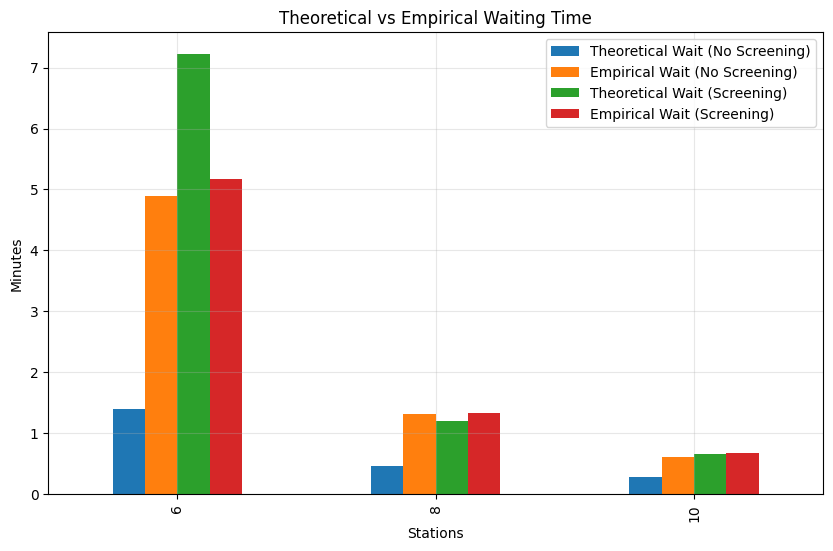

In [11]:
# 5. Theory vs Empirical Comparison (bars)
subset = [6,8,10]
comp = pd.DataFrame({
    "Stations": subset,
    "Theoretical Wait (No Screening)": theory_no_screen.set_index("Stations").loc[subset]["Wq (min)"],
    "Empirical Wait (No Screening)": [empirical_no_screening[s]["avg_waiting_time"][0] for s in subset],
    "Theoretical Wait (Screening)": theory_with_screen.set_index("Stations").loc[subset]["Wq (min)"],
    "Empirical Wait (Screening)": [empirical_with_screening[s]["avg_waiting_time"][0] for s in subset]
})
comp.plot(x="Stations", kind="bar", figsize=(10,6))
plt.title("Theoretical vs Empirical Waiting Time")
plt.ylabel("Minutes")
plt.grid(alpha=0.3)
plt.show()

In [12]:
# -------------------
# Theory vs Simulation Comparison (6, 8, 10 stations)
# -------------------
comparison = []
for stations in [6, 8, 10]:
    sim_no = empirical_no_screening[stations]["avg_waiting_time"][0]
    sim_yes = empirical_with_screening[stations]["avg_waiting_time"][0]

    theory_no = theory_no_screen.loc[theory_no_screen["Stations"]==stations, "Wq (min)"].values[0]
    theory_yes = theory_with_screen.loc[theory_with_screen["Stations"]==stations, "Wq (min)"].values[0]

    comparison.append([stations, theory_no, sim_no, theory_yes, sim_yes])

df_comparison = pd.DataFrame(
    comparison,
    columns=["Stations", "Theoretical Wait", "Empirical Wait",
             "Theoretical Wait (Screen)", "Empirical Wait (Screen)"]
)
display(df_comparison)


,Stations,Theoretical Wait,Empirical Wait,Theoretical Wait (Screen),Empirical Wait (Screen)
0,6,1.388889,4.893331,7.222222,5.169497
1,8,0.462963,1.320026,1.203704,1.327902
2,10,0.277778,0.614968,0.656566,0.669287


In [13]:
# (4, 6, 8, 10).
st_used = np.array([4, 6, 8, 10])

# --- Table 1: Stations vs Average Waiting Before Screening (theory, no screening)
T1 = (theory_no_screen
      .set_index("Stations")
      .loc[st_used, ["Wq (min)"]]
      .rename(columns={"Wq (min)": "Average Waiting Before Screening (min)"})
      .reset_index())
print("Table 1. Number of Stations vs Average Waiting Before Screening (Theory, No Screening)")
display(_round_cols(T1, ["Average Waiting Before Screening (min)"], 3))

# --- Table 2: Stations vs Average People Waiting (Average Queue Length) (theory, no screening)
T2 = (theory_no_screen
      .set_index("Stations")
      .loc[st_used, ["Lq (waiting only)"]]
      .rename(columns={"Lq (waiting only)": "Average People Waiting (all lines combined)"})
      .reset_index())
print("Table 2. Number of Stations vs Average People Waiting (Theory, No Screening)")
display(_round_cols(T2, ["Average People Waiting (all lines combined)"], 2))

# --- Table 3: Stations vs Average Waiting Time With Screening (theory)
T3 = (theory_with_screen
      .set_index("Stations")
      .loc[st_used, ["Wq (min)"]]
      .rename(columns={"Wq (min)": "Average Waiting Time With Screening (min)"})
      .reset_index())
print("Table 3. Number of Stations vs Average Waiting Time With Screening (Theory)")
display(_round_cols(T3, ["Average Waiting Time With Screening (min)"], 3))

# --- Table 4: Stations vs Average People Waiting With Screening (theory)
T4 = (theory_with_screen
      .set_index("Stations")
      .loc[st_used, ["Lq (waiting only)"]]
      .rename(columns={"Lq (waiting only)": "Average People Waiting With Screening (all lines combined)"})
      .reset_index())
print("Table 4. Number of Stations vs Average People Waiting With Screening (Theory)")
display(_round_cols(T4, ["Average People Waiting With Screening (all lines combined)"], 2))


Table 1. Number of Stations vs Average Waiting Before Screening (Theory, No Screening)


,Stations,Average Waiting Before Screening (min)
0,4,inf
1,6,1.389
2,8,0.463
3,10,0.278


Table 2. Number of Stations vs Average People Waiting (Theory, No Screening)


,Stations,Average People Waiting (all lines combined)
0,4,inf
1,6,13.89
2,8,4.63
3,10,2.78


Table 3. Number of Stations vs Average Waiting Time With Screening (Theory)


,Stations,Average Waiting Time With Screening (min)
0,4,inf
1,6,7.222
2,8,1.204
3,10,0.657


Table 4. Number of Stations vs Average People Waiting With Screening (Theory)


,Stations,Average People Waiting With Screening (all lines combined)
0,4,inf
1,6,72.22
2,8,12.04
3,10,6.57


In [14]:
# Joined table for decision making
util = pd.DataFrame({
    "Stations": QUEUE_OPTIONS,
    "Utilization ρ": np.round(ARRIVAL_RATE * SERVICE_TIME / np.array(QUEUE_OPTIONS), 3)
})

# pick the WITH-SCREENING columns 
wt_cols = ["Stations",
           "Waiting Time (min) (Mean, With Screening)",
           "Waiting Time (min) (CI Low, With Screening)",
           "Waiting Time (min) (CI High, With Screening)"]
ql_cols = ["Stations",
           "Average Queue Length (Mean, With Screening)",
           "Average Queue Length (CI Low, With Screening)",
           "Average Queue Length (CI High, With Screening)"]
mq_cols = ["Stations",
           "Max Queue Length (Mean, With Screening)",
           "Max Queue Length (CI Low, With Screening)",
           "Max Queue Length (CI High, With Screening)"]

decision = (util
    .merge(tbl_wait_ci[wt_cols], on="Stations")
    .merge(tbl_avgq_ci[ql_cols], on="Stations")
    .merge(tbl_maxq_ci[mq_cols], on="Stations"))

print("Unified summary (With screening): ρ, time in system, avg queue, max queue (95% CI)")
display(decision)


Unified summary (WITH screening): ρ, time in system, avg queue, max queue (95% CI)


,Stations,Utilization ρ,"Waiting Time (min) (Mean, With Screening)","Waiting Time (min) (CI Low, With Screening)","Waiting Time (min) (CI High, With Screening)","Average Queue Length (Mean, With Screening)","Average Queue Length (CI Low, With Screening)","Average Queue Length (CI High, With Screening)","Max Queue Length (Mean, With Screening)","Max Queue Length (CI Low, With Screening)","Max Queue Length (CI High, With Screening)"
0,4,1.250,25.823,25.412,26.233,43.048,42.505,43.591,86.310,85.321,87.299
1,6,0.833,5.169,4.809,5.530,8.424,7.946,8.903,18.570,17.659,19.481
2,8,0.625,1.328,1.128,1.528,2.362,2.141,2.584,6.970,6.490,7.450
3,10,0.500,0.669,0.542,0.797,1.314,1.199,1.428,4.084,3.785,4.383
